First, let's import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We import a dataset form the rich collection provided by the library sklearn:

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR) # prints a description of the dataset (note: without 'print' it displays awfully)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The way info are stored in the dataset is a bit weird:

In [3]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

It seems that the info are "disassembled", like a block of bricks; therefore, we have to assemble the dataset! We first convert the dataset into a pandas dataframe:

In [4]:
boston_features = pd.DataFrame(boston.data)
boston_features

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Now we give the columns the proper names

In [5]:
boston_features.columns = boston.feature_names
boston_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Aah, much better!

This data frame contains the *indepenent variables* which may play a role in determining the value of the dependent variable (in this case, house price). The dependent variables can be stored in another data frame...

In [6]:
boston_values = pd.DataFrame(boston.target)
boston_values.columns = ['VALUE (in $10000\'s)']
boston_values

,VALUE (in $10000's)
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


... or they can be appended to the data frame of variables

In [7]:
boston_df = pd.concat([boston_features, boston_values], axis = 1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,VALUE (in $10000's)
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


We want to see if we can satisfactorily explain the value of the houses with a linear regression on the features. For this, we import the necessary tools from sklearn:

In [8]:
from sklearn.linear_model import LinearRegression

`LinearRegression` is an object with several methods. In particular, the `.fit(X_train, y_train)` method fits the linear model with `X_train` as values of the independent variables and `y_train` as the values of the dependent variable. The method returns the slopes (coefficients) and intercept of the linear space which best approximates the relationship between `X_train` and `y_train` (in the sense of least sqare error). The method `.predict(X_test)` returns the value of the dependent variable calculated by applying the previously fitted linear model to the values of the independent variables specified in `X_test`. The method `.score()` checks how good a fitted linear model is.

In case you wonder, I use a capital *X* and a small *y* to mark the fact that in general there may be more than one independent variables, but just one dependent variable.


In [9]:
lreg = LinearRegression(normalize = True) # this creates an object of type LinearRegression.
#'normalize = True' normalizes the indep vars before regression by subtracting the mean and dividing by the l2-norm

Now, a basic rule of statistics is that we cannot test a model on the same data which has been used to train the model. Any data contains some random patterns in addition to the true relationship between variables. If we apply a model fitted with some data to some *other* data, then the true relationship between variables would still appear, but the random patterns would receive no confirmation in the second data. On the contrary, if we apply the model to the same data used for the fitting, there is no way to cross-check and separate the random patterns from the true relationship between variables.

What then if we only have one dataset, like in this example?

Well, we split it into 2 disjoint subsets, one of which will be used for the fitting, the other for the testing. The library `sklearn` provides the command `train_test_split` to randomly partition a dataset into a train part and a test part.

In [10]:
from sklearn.model_selection import train_test_split

X = boston_features
y = boston_values['VALUE (in $10000\'s)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # we use 30% of the data for testing

It makes sense to allocate more data for the training (that is, the fitting), in order to get more precise insights.

Now we are ready to fit our model, that is, to find the coefficients and intercept of the hyperplane which best approximates the house values as a linear (affine) function of the 13 house features.

In [11]:
lreg.fit(X_train, y_train) # lreg was our LinearRegression object

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Now the coefficients and intercept of the linear model are safely stored as attributes of the object `lreg`. We can visualize (and acess them) as follows:

In [12]:
lreg.coef_ # surprise surprise, these are the coefficients...

array([-1.11035471e-01,  5.22709357e-02,  5.80166902e-02,  1.22566412e+00,
       -1.82178557e+01,  3.37267602e+00, -1.39432200e-03, -1.65817052e+00,
        2.57718850e-01, -1.17167226e-02, -9.66210471e-01,  8.17597577e-03,
       -5.81855041e-01])

In [13]:
lreg.intercept_ # ... and this is the intercept... unbelievable

41.42597062070185

Having these numbers is great, but in this format they are not particularly human-friendly. Let us arrange them in a more intelligible way. The *k*-th element of `lreg.coef_` is the coefficient of linear correlation between the *k*-th house feature and the house value, so let us pair the features and coefficients in a new data frame:

In [21]:
boston_coef = pd.DataFrame(lreg.coef_, index = boston.feature_names, columns = ['coefficient estimate'])
# this creates a data frame with the house features as indices and lreg.coef_ as values
boston_coeff = pd.DataFrame({'Feature':boston.feature_names, 'Coefficient estimate':lreg.coef_})
# this creates a data frame with both the house features and lreg.coef_ as values

In [22]:
boston_coef

,coefficient estimate
CRIM,-0.111035
ZN,0.052271
INDUS,0.058017
CHAS,1.225664
NOX,-18.217856
RM,3.372676
AGE,-0.001394
DIS,-1.658171
RAD,0.257719
TAX,-0.011717


In [23]:
boston_coeff

,Feature,Coefficient estimate
0,CRIM,-0.111035
1,ZN,0.052271
2,INDUS,0.058017
3,CHAS,1.225664
4,NOX,-18.217856
5,RM,3.372676
6,AGE,-0.001394
7,DIS,-1.658171
8,RAD,0.257719
9,TAX,-0.011717


A reminder: 
a positive (resp. negative) coefficient for a given feature means that the house value increases 

1.   a positive (resp. negative) coefficient for a given feature means that the house value increases (resp. decreases) with the house feature;
2.   the bigger the absolute value of the coefficient is, the stronger the influence of the feature is on the house value. 

In our case, *NOX* is by far the feature with the strongest impact on house values, and this impact is negative. Checking the description of Boston housing database (`boston.DESCR`), we see that *NOX* is the *concentration of nitric oxides*, which are air pollutants produced by the compustion of fuels. Hence the data are saying that the house value drops significantly in highly polluted areas. In an analogous way, the house value increases with the number of rooms.

All this is very well, but can we trust this analysis to capture the true relationship between house features and price? Remember that we have set 30% of the data aside before fitting the model on the remaining 70%. I want to stress that the algorithm which constructed our linear model *has never even been aware of this 30% extra data*. Therefore, to answer the above question, we can compare the prediction of our model on the 30% extra data with the real prices of these 30% houses.

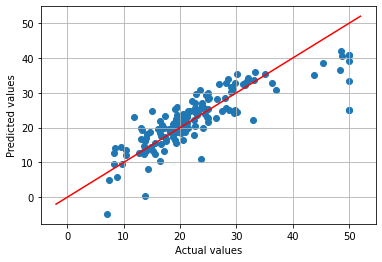

In [38]:
y_predict = lreg.predict(X_test)# this computes the predicted prices of the houses in X_test,
# using our linear regression model

plt.scatter(y_test, y_predict)# we plot the predicted house values against the real ones
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.linspace(-2,52,5500), np.linspace(-2,52,5500), 'r')# for comparison, the line y=x
plt.grid()
plt.show()

Not bad: the dots are close to the red line, that is, there is good accordance between predicted and actual house prices. 

Notice the cluster of points with actual values between 40 and 50 ($10000's): they are all below the line y=x. It seems that our linear model underestimates the price of luxury houses. However, by the exact same fact that we are considering houses with high values, in relative terms the loss of accuracy is small, or, in other words, bigger fluctuations are to be expected on higher values. In conclusion, we can legitimately be satisfied by our model.

Notice also that our model assigns one house a negative value! Our model is an abstraction, which does not know that real houses don't have a negative value (if worst comes to worst, at least they are worth the lot of land they are built on).

Let's see another comparison between predicted and actual house values:

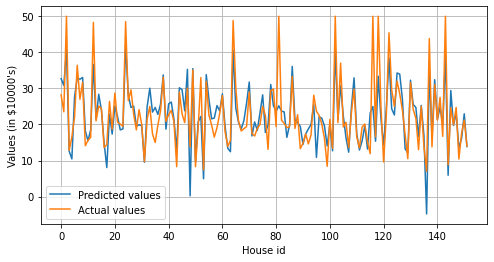

In [53]:
plt.figure(figsize=(8,4))
plt.plot(y_predict, label = 'Predicted values')
plt.plot(np.array(y_test), label = 'Actual values')# for comparison, the line y=x
plt.xlabel('House id')
plt.ylabel('Values (in $10000\'s)')
plt.grid()
plt.legend()
plt.show()

Finally, we can plot the *residues*, that is, the differences between actual and predicted values, against the predicted values:

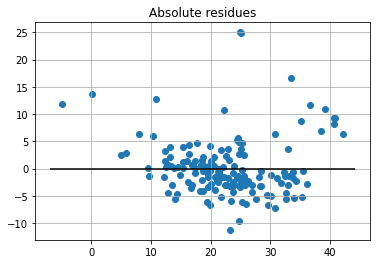

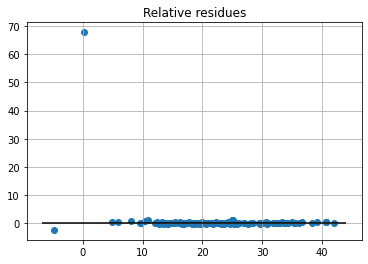

In [50]:
plt.scatter(y_predict, y_test-y_predict)
plt.hlines(y = 0, xmin = min(y_predict)-2, xmax = max(y_predict+2))
plt.title('Absolute residues')
plt.grid()
plt.show()

plt.scatter(y_predict, (y_test-y_predict)/y_predict)
plt.hlines(y = 0, xmin = min(y_predict)-2, xmax = max(y_predict+2))
plt.title('Relative residues')
plt.grid()
plt.show()

Not bad: in the absolute residue plot, we do not see any obvious patterns (which would signal the presence of a more complicated relationship between the data, which went unnoticed by the linear model). Moreover, the relative residues are almost all very close to 0. The exceptional point that shoots at almost 70 can be explained as the result of a fraction with a very small denominator rather than a very big numerator (compare with the absolute residue): the problem there is not that the predicted and the actual values are very far apart, but rather than the predicted value is very close to 0.